# Set up the data


Generate a small dataset. Here we will create a small linear regression dataset with a single feature and target variable.

In [2]:
import numpy as np

np.random.seed(31415)

n_samples = 1000

a = 10

b = -10

noise = 0.5

x = np.random.rand(n_samples, 1) * 10
y = a * x + b + np.random.rand(n_samples , 1)*noise


print("Feature data (x) \n", x[:20])
print("Target data (y) \n", y[:20])

Feature data (x) 
 [[6.45818606]
 [6.7517417 ]
 [9.70703986]
 [8.84804364]
 [9.09065843]
 [8.23592966]
 [4.86709721]
 [6.2099358 ]
 [6.43512463]
 [4.00369566]
 [8.75219111]
 [6.08606454]
 [1.0669999 ]
 [2.54308892]
 [0.35469997]
 [5.01164227]
 [6.17444704]
 [3.15636288]
 [3.40152271]
 [1.99828184]]
Target data (y) 
 [[55.05915308]
 [57.53338736]
 [87.1818016 ]
 [78.54157928]
 [81.0589224 ]
 [72.51604476]
 [39.02552645]
 [52.1207629 ]
 [54.49800451]
 [30.43902163]
 [77.8258464 ]
 [51.11891308]
 [ 0.72323428]
 [15.52571864]
 [-6.38869588]
 [40.19900474]
 [52.12833383]
 [22.04917678]
 [24.16963547]
 [10.17510268]]


Organize the dataset as an array, with each row representing a data sample and its corresponding target

In [3]:
data = np.hstack((x,y))

print("Organized data (Feature, Target) is: \n", data[:20])

Organized data (Feature, Target) is: 
 [[ 6.45818606 55.05915308]
 [ 6.7517417  57.53338736]
 [ 9.70703986 87.1818016 ]
 [ 8.84804364 78.54157928]
 [ 9.09065843 81.0589224 ]
 [ 8.23592966 72.51604476]
 [ 4.86709721 39.02552645]
 [ 6.2099358  52.1207629 ]
 [ 6.43512463 54.49800451]
 [ 4.00369566 30.43902163]
 [ 8.75219111 77.8258464 ]
 [ 6.08606454 51.11891308]
 [ 1.0669999   0.72323428]
 [ 2.54308892 15.52571864]
 [ 0.35469997 -6.38869588]
 [ 5.01164227 40.19900474]
 [ 6.17444704 52.12833383]
 [ 3.15636288 22.04917678]
 [ 3.40152271 24.16963547]
 [ 1.99828184 10.17510268]]


# Implement mini-batch

Define a function to split the dataset into mini-batches of specified size

In [4]:
def create_mini_batches(data, batch_size):
  ''' Split the dataset into mini-batches, each of size batch_size.
  Parameters:
  - data: the numpy array containing feature and target labels
  - batch_size: the number of samples per mini-batch

  Returns:
  - A list of mini-batches, where each mini-batch is a numpy array of the shape (batch_size, 2)
  '''
  np.random.shuffle(data)

  mini_batches = []

  for i in range(0, len(data), batch_size):
    mini_batch = data[i: i + batch_size]
    mini_batches.append(mini_batch)

  return mini_batches

In [8]:
batch_size = 32
mini_batches = create_mini_batches(data, batch_size)

print("First mini batch is : \n", mini_batches[0])
print("2nd mini batch has ", len(mini_batches[1]))
print("Second mini batch is: \n", mini_batches[1])
print("29th mini batch is: \n", mini_batches[28])
print("We have a total of this many mini batches \n", len(mini_batches))

First mini batch is : 
 [[ 2.95510791e+00  1.96047536e+01]
 [ 3.38533669e+00  2.39556231e+01]
 [ 2.02962126e+00  1.05260549e+01]
 [ 8.26347611e+00  7.29153498e+01]
 [ 7.14616025e+00  6.15377226e+01]
 [ 7.69326172e+00  6.73966641e+01]
 [ 4.44576153e+00  3.48544475e+01]
 [ 9.90733417e-01 -3.18076116e-02]
 [ 6.84321391e+00  5.88301878e+01]
 [ 2.93722392e+00  1.94178430e+01]
 [ 6.63129890e+00  5.66866175e+01]
 [ 4.93352964e+00  3.93592762e+01]
 [ 3.15971114e+00  2.20821677e+01]
 [ 5.37165948e+00  4.40304608e+01]
 [ 3.00040914e+00  2.04345271e+01]
 [ 6.13331842e+00  5.17709814e+01]
 [ 1.59463458e-01 -7.96887566e+00]
 [ 5.22762943e+00  4.27027614e+01]
 [ 6.43512463e+00  5.44980045e+01]
 [ 7.93764638e-01 -1.59069355e+00]
 [ 3.17618619e+00  2.20189191e+01]
 [ 3.04639130e+00  2.05696199e+01]
 [ 7.85085719e-01 -1.85964941e+00]
 [ 4.71481691e+00  3.71882250e+01]
 [ 8.61749350e+00  7.65576582e+01]
 [ 1.07122997e+00  1.17797844e+00]
 [ 2.66496041e+00  1.71355617e+01]
 [ 4.59609906e+00  3.61938945e+

Ensure the function handles edge cases (example: the last batch has lesser samples when the total isn't cleanly divided by the batch size)

In [9]:
print("the last mini batch has the following elements: \n", mini_batches[31])

the last mini batch has the following elements: 
 [[ 0.8178862  -1.63153736]
 [ 1.45711572  5.00071615]
 [ 3.5750251  25.91471817]
 [ 7.98918017 70.34378477]
 [ 2.93633734 19.62881111]
 [ 9.5114649  85.55094691]
 [ 1.58916861  6.31503502]
 [ 1.41703619  4.4652463 ]]


In [10]:
print("the last mini batch has the following elements: \n", mini_batches[-1])

the last mini batch has the following elements: 
 [[ 0.8178862  -1.63153736]
 [ 1.45711572  5.00071615]
 [ 3.5750251  25.91471817]
 [ 7.98918017 70.34378477]
 [ 2.93633734 19.62881111]
 [ 9.5114649  85.55094691]
 [ 1.58916861  6.31503502]
 [ 1.41703619  4.4652463 ]]


# Initialize model parameters

Create model parameters from scratch, initialize weights and biases as random values


In [12]:
def initialize_parameters():
  weight = np.random.randn()
  bias = np.random.randn()
  return weight, bias

weight, bias = initialize_parameters()

print("Initialized weight is ", weight)
print("Initialized bias is ", bias)

Initialized weight is  -0.06985719172709007
Initialized bias is  -1.333647536471217


# Define the forward pass and loss calculation

In [13]:
def forward_pass(x, weight, bias):
  y_pred = x * weight + bias
  return y_pred

def calculate_mse(y_pred, y_actual):
  mse = np.mean((y_pred - y_actual)**2)
  return mse



In [14]:
batch_x = mini_batches[0][:, 0].reshape(-1,1)
batch_y = mini_batches[0][:,1].reshape(-1,1)

y_pred = forward_pass(batch_x, weight, bias)
loss = calculate_mse(y_pred, batch_y)

print("Predictions \n", y_pred[:10])
print("Actuals \n", batch_y[:10])
print("MSE Loss \n", loss)

Predictions 
 [[-1.54008308]
 [-1.57013765]
 [-1.47543118]
 [-1.91091077]
 [-1.83285822]
 [-1.8710772 ]
 [-1.64421595]
 [-1.40285739]
 [-1.81169524]
 [-1.53883375]]
Actuals 
 [[ 1.96047536e+01]
 [ 2.39556231e+01]
 [ 1.05260549e+01]
 [ 7.29153498e+01]
 [ 6.15377226e+01]
 [ 6.73966641e+01]
 [ 3.48544475e+01]
 [-3.18076116e-02]
 [ 5.88301878e+01]
 [ 1.94178430e+01]]
MSE Loss 
 1622.9343439236782


# Implement gradient calculation

Compute gradients for each mini-batch

In [15]:
def compute_gradients(x, y_actual, y_pred):
  batch_size = x.shape[0]
  error = y_actual - y_pred
  d_weight = (2/batch_size) * np.sum(x*error)
  d_bias = (2/batch_size) * np.sum(error)
  return d_weight, d_bias

In [16]:
y_pred = forward_pass(batch_x, weight, bias)

In [17]:
d_weight, d_bias = compute_gradients(batch_x, batch_y, y_pred)

In [18]:
print("Gradient wrt weight: ", d_weight)

Gradient wrt weight:  376.9163281467138


In [19]:
print("Gradient wrt bias: ", d_bias)

Gradient wrt bias:  65.57235957753323


# Update parameters with mini-batch gradient descent

In [20]:
def update_parameters(weight, bias, d_weight, d_bias, learning_rate):
  updated_weight = weight - learning_rate * d_weight
  updated_bias = bias - learning_rate * d_bias

  return updated_weight, updated_bias



In [21]:
learning_rate = 0.01

In [22]:
y_pred = forward_pass(batch_x, weight, bias)
d_weight, d_bias = compute_gradients(batch_x, batch_y, y_pred)
print("Current weight is ", weight)
print("Current bias is ", bias)
weight, bias = update_parameters(weight, bias, d_weight, d_bias, learning_rate)

print("Updated weight is ", weight)
print("Updated bias is ", bias)

Current weight is  -0.06985719172709007
Current bias is  -1.333647536471217
Updated weight is  -3.839020473194228
Updated bias is  -1.9893711322465495


# Track progress and observe convergence

Epoch 1/100; loss:  4206722379802300.5000
Epoch 11/100; loss:  743503320074259850976833326171836066397571586452627120567902738730205774462462329456405826305078632646489764527353896622336312425143258004587480112067055190016.0000
Epoch 21/100; loss:  50507070359260502240957472164921005168007283646531973671893085066843033545607242381640308641428191804741465714557256779134307267547411511601971295449482288088827864278122668268283146454570459291633043724118784023060309473323519622157821658536888196964015967529169031055818921170051167799136460143067136.0000
Epoch 31/100; loss:  inf
Epoch 41/100; loss:  inf
Epoch 51/100; loss:  inf
Epoch 61/100; loss:  inf


<ipython-input-24-96b7f917649f>:19: RuntimeWarning: overflow encountered in scalar add
  epoch_loss = epoch_loss + loss*batch_x.shape[0]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-13-57bf62da4935>:6: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_pred - y_actual)**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Epoch 71/100; loss:  inf
Epoch 81/100; loss:  inf
Epoch 91/100; loss:  inf


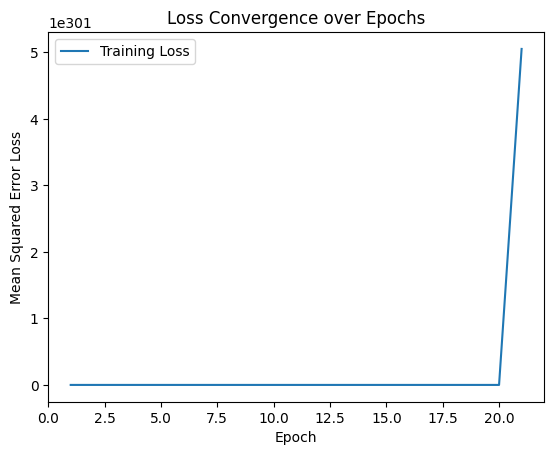

In [24]:
epochs = 100
batch_size = 32

weight, bias = initialize_parameters()

epoch_losses  = []

for epoch in range(epochs):
  mini_batches = create_mini_batches(data, batch_size)
  epoch_loss = 0

  for mini_batch in mini_batches:
    batch_x = mini_batch[:,0].reshape(-1,1)
    batch_y = mini_batch[:,1].reshape(-1,1)

    y_pred = forward_pass(batch_x, weight, bias)
    loss= calculate_mse(y_pred, batch_y)

    epoch_loss = epoch_loss + loss*batch_x.shape[0]

    d_weight, d_bias = compute_gradients(batch_x, batch_y, y_pred)

    weight, bias = update_parameters(weight, bias, d_weight, d_bias, learning_rate)

  epoch_loss = epoch_loss/len(data)

  epoch_losses.append(epoch_loss)

  if(epoch%10 == 0) or (epoch == epoch -1):
    print(f"Epoch {epoch + 1}/{epochs}; loss: {epoch_loss: .4f}")



import matplotlib.pyplot as plt


plt.plot(range(1, epochs + 1), epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss Convergence over Epochs')
plt.legend()
plt.show()